# Nilearn Tutorial 4
With DS109 dataset taken from openfmri.org

In [1]:
%matplotlib inline 
import seaborn
import nibabel as nib
import nilearn
import numpy as np
import matplotlib.pyplot as plt

### load data using nibabel

In [2]:
fb_sub2run1 = nib.load('/home/farahana/Documents/dataset/Multi Subject/ds109/sub002/BOLD/task001_run001/bold.nii')
print (fb_sub2run1.shape)

fb_sub2run1_label = np.genfromtxt('/home/farahana/Documents/dataset/Multi Subject/ds109/sub002/behav/task001_run001/behavdata.txt', skip_header=1)
print (fb_sub2run1_label.shape)

(72, 72, 36, 179)
(179, 6)


In [3]:
# take StoryCode in behavdata.txt as labels or targets for fMRI dataset
fb_sub2run1_labels = fb_sub2run1_label[:,2]

In [4]:
from nilearn.input_data import NiftiMasker
#fb_mask = nib.load('/home/farahana/Documents/dataset/Multi Subject/ds109/sub002/anatomy/highres001_brain_mask.nii')
masker = NiftiMasker(memory='nilearn_cache', mask_strategy='epi')
masker.fit(fb_sub2run1)
fb_sub2run1_masked = masker.mask_img

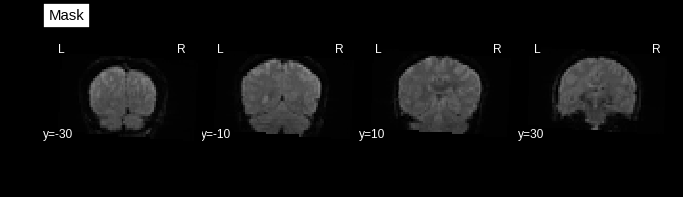

In [5]:
from nilearn.plotting import plot_roi
import nilearn.image as image
fb_mean = image.mean_img(fb_sub2run1)
plot_roi(fb_sub2run1_masked, fb_mean, display_mode='y', cut_coords=4, title="Mask")

In [6]:
masker.fit(fb_sub2run1)
fb_sub2run1_fmri = masker.transform(fb_sub2run1)
print (fb_sub2run1_fmri.shape)

(179, 37551)


### Splitting the data

In [7]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(fb_sub2run1_fmri, fb_sub2run1_labels, random_state=130)

## Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression
logR_clf = LogisticRegression()

In [9]:
logR_clf.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
label_pred = logR_clf.predict(x_test)

In [11]:
logR_clf.score(x_test,y_test)

0.68888888888888888

### visualize the logistic regression on the anatomical maps.

In [12]:
logR_coef = logR_clf.coef_
print (logR_coef.shape)

(13, 37551)


In [13]:
 logR_img = masker.inverse_transform(logR_coef[0:1,:])
 print(logR_img.shape)

(72, 72, 36, 1)


In [14]:
from nilearn.plotting import plot_stat_map, show

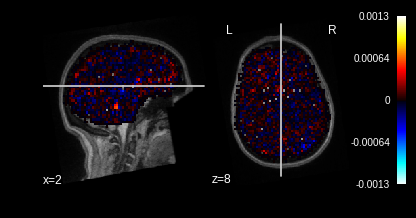

In [17]:
fb_anat = nib.load('/home/farahana/Documents/dataset/Multi Subject/ds109/sub002/anatomy/highres001.nii')
plot_stat_map(logR_img, bg_img=fb_anat, display_mode='xz')